"We certify that the code and data in this assignment were generated independently,
using only the tools and resources defined in the course and that we did not receive
any external help, coaching or contributions during the production of this work."

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sb
from tensorflow import keras
from keras.regularizers import l2
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow_datasets as tfds
from tensorflow.keras import layers
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping

## Part-1

In [78]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

/Users/saipavan/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


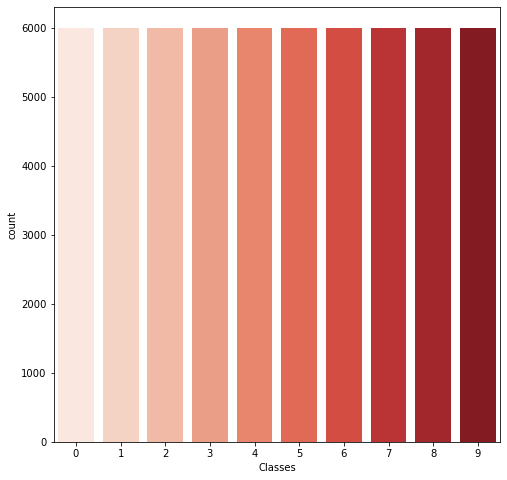

In [79]:
plt.figure(figsize=(8,8))
sb.countplot(trainy,palette="Reds")
plt.xlabel('Classes')
plt.show()

/Users/saipavan/miniforge3/envs/tensorflow/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


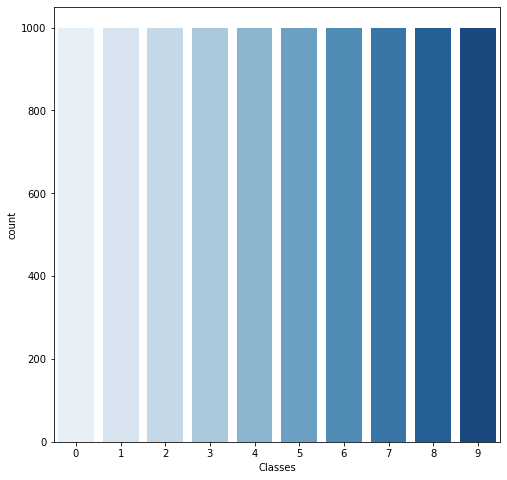

In [80]:
plt.figure(figsize=(8,8))
sb.countplot(testy,palette="Blues")
plt.xlabel('Classes')
plt.show()

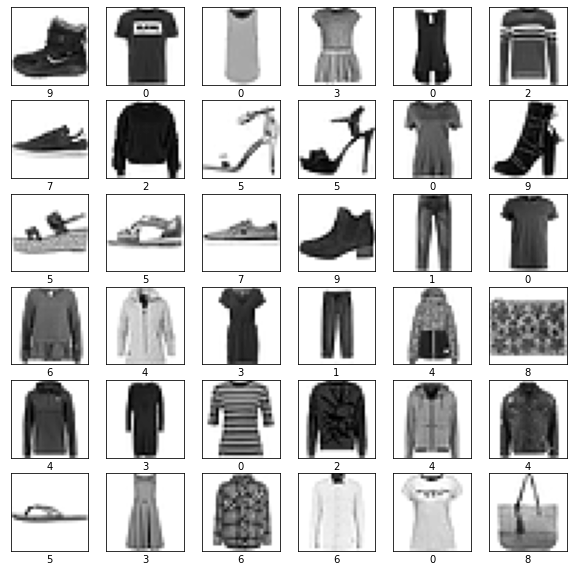

In [81]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(trainy[i])
plt.show()

In [82]:
# type conversion
trainX=trainX.astype('float32')
testX = testX.astype('float32')

In [83]:
#One hot encoding
trainy =np.eye(trainy.max()+1)[trainy]
testy = np.eye(testy.max()+1)[testy]

In [84]:
# scaling 0-1
trainX = trainX/255.0
testX = testX/255.0

In [85]:
trainX = trainX.reshape(trainX.shape[0],28,28,1)
testX = testX.reshape(testX.shape[0],28,28,1)

In [86]:
trainX.shape

(60000, 28, 28, 1)

In [87]:
trainy.shape

(60000, 10)

In [106]:
# CNN - MODEL 
con_mod = Sequential([
    Conv2D(filters=20,kernel_size=3,activation='relu',input_shape = (28,28,1)),
    Conv2D(filters=30,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=2) ,
    Flatten(),
    Dense(200,activation ='relu'),
    Dense(300,activation='relu'),
    Dense(10,activation = 'softmax')    
])



In [89]:
con_mod.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 20)        200       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 30)        5430      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4320)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               864200    
_________________________________________________________________
dense_4 (Dense)              (None, 300)               60300     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [107]:
con_mod.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])
history_base = con_mod.fit(trainX,trainy,batch_size=4096,epochs=40,verbose=1,validation_data=(testX,testy))



Epoch 1/40


2022-04-20 21:14:55.866174: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 1.7515 - accuracy: 0.4662

2022-04-20 21:15:00.968193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 6s 356ms/step - loss: 1.7238 - accuracy: 0.4744 - val_loss: 0.7708 - val_accuracy: 0.7332
Epoch 2/40
15/15 [==============================] - 5s 341ms/step - loss: 0.6881 - accuracy: 0.7483 - val_loss: 0.5771 - val_accuracy: 0.7869
Epoch 3/40
15/15 [==============================] - 5s 341ms/step - loss: 0.5373 - accuracy: 0.8039 - val_loss: 0.4974 - val_accuracy: 0.8177
Epoch 4/40
15/15 [==============================] - 5s 339ms/step - loss: 0.4658 - accuracy: 0.8355 - val_loss: 0.4639 - val_accuracy: 0.8326
Epoch 5/40
15/15 [==============================] - 5s 344ms/step - loss: 0.4278 - accuracy: 0.8479 - val_loss: 0.4138 - val_accuracy: 0.8542
Epoch 6/40
15/15 [==============================] - 5s 338ms/step - loss: 0.3864 - accuracy: 0.8643 - val_loss: 0.3962 - val_accuracy: 0.8585
Epoch 7/40
15/15 [==============================] - 5s 344ms/step - loss: 0.3655 - accuracy: 0.8713 - val_loss: 0.3783 - val_accuracy: 0.8660
Epoch 8/40
15/15 

### Earlystopping 

In [103]:
#Early stopping

con_mod_ear = Sequential([
    Conv2D(filters=20,kernel_size=3,activation='relu',input_shape = (28,28,1)),
    Conv2D(filters=30,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=2) ,
    Flatten(),
    Dense(200,activation ='relu'),
    Dense(300,activation='relu'),
    Dense(10,activation = 'softmax')
])


con_mod_ear.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])
e_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)
history_ear = con_mod_ear.fit(trainX,trainy,batch_size=4096,epochs=100,verbose=1,validation_data=(testX,testy),callbacks=[e_stop])




Epoch 1/100


2022-04-20 21:06:56.347704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 1.7596 - accuracy: 0.4443

2022-04-20 21:07:01.489468: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 6s 356ms/step - loss: 1.7319 - accuracy: 0.4529 - val_loss: 0.7736 - val_accuracy: 0.7323
Epoch 2/100
15/15 [==============================] - 5s 334ms/step - loss: 0.6901 - accuracy: 0.7496 - val_loss: 0.5774 - val_accuracy: 0.7880
Epoch 3/100
15/15 [==============================] - 5s 336ms/step - loss: 0.5406 - accuracy: 0.8037 - val_loss: 0.5068 - val_accuracy: 0.8164
Epoch 4/100
15/15 [==============================] - 5s 340ms/step - loss: 0.4655 - accuracy: 0.8328 - val_loss: 0.4630 - val_accuracy: 0.8294
Epoch 5/100
15/15 [==============================] - 5s 336ms/step - loss: 0.4211 - accuracy: 0.8510 - val_loss: 0.4267 - val_accuracy: 0.8498
Epoch 6/100
15/15 [==============================] - 5s 338ms/step - loss: 0.3877 - accuracy: 0.8647 - val_loss: 0.3911 - val_accuracy: 0.8607
Epoch 7/100
15/15 [==============================] - 5s 338ms/step - loss: 0.3541 - accuracy: 0.8765 - val_loss: 0.3671 - val_accuracy: 0.8732
Epoch 8/100

### Batch Normalization

In [93]:
con_mod_batch = Sequential([
    Conv2D(filters=20,kernel_size=3,activation='relu',input_shape = (28,28,1)),
    Conv2D(filters=30,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=2) ,
    Flatten(),
    Dense(200,activation ='relu'),
    BatchNormalization(),
    Dense(300,activation='relu'),
    BatchNormalization(),
    Dense(10,activation = 'softmax')
    
])


con_mod_batch.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])
history = con_mod_batch.fit(trainX,trainy,batch_size=4096,epochs=40,verbose=1,validation_data=(testX,testy))



Epoch 1/40


2022-04-20 20:40:33.475722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 1.2555 - accuracy: 0.5879

2022-04-20 20:40:38.694714: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 7s 361ms/step - loss: 1.2260 - accuracy: 0.5969 - val_loss: 1.9120 - val_accuracy: 0.5829
Epoch 2/40
15/15 [==============================] - 5s 355ms/step - loss: 0.3984 - accuracy: 0.8577 - val_loss: 1.8278 - val_accuracy: 0.5450
Epoch 3/40
15/15 [==============================] - 5s 352ms/step - loss: 0.3136 - accuracy: 0.8892 - val_loss: 1.7947 - val_accuracy: 0.5413
Epoch 4/40
15/15 [==============================] - 5s 343ms/step - loss: 0.2620 - accuracy: 0.9063 - val_loss: 1.7362 - val_accuracy: 0.5743
Epoch 5/40
15/15 [==============================] - 5s 347ms/step - loss: 0.2258 - accuracy: 0.9186 - val_loss: 1.6928 - val_accuracy: 0.6033
Epoch 6/40
15/15 [==============================] - 5s 350ms/step - loss: 0.2016 - accuracy: 0.9284 - val_loss: 1.6468 - val_accuracy: 0.6421
Epoch 7/40
15/15 [==============================] - 5s 350ms/step - loss: 0.1766 - accuracy: 0.9383 - val_loss: 1.6260 - val_accuracy: 0.6080
Epoch 8/40
15/15 

### L2 regularization

In [94]:
con_mod_reg = Sequential([
    Conv2D(filters=20,kernel_size=3,activation='relu',input_shape = (28,28,1)),
    Conv2D(filters=30,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=2) ,
    Flatten(),
    Dense(200,activation ='relu',kernel_regularizer=keras.regularizers.l2(l=0.01)),
    Dense(300,activation='relu',kernel_regularizer=keras.regularizers.l2(l=0.01)),
    Dense(10,activation = 'softmax')    
])

con_mod_reg.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])
history = con_mod_reg.fit(trainX,trainy,batch_size=4096,epochs=40,verbose=1,validation_data=(testX,testy))



Epoch 1/40


2022-04-20 20:44:11.024627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 7.9117 - accuracy: 0.4118

2022-04-20 20:44:16.092566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 6s 350ms/step - loss: 7.8365 - accuracy: 0.4196 - val_loss: 4.6050 - val_accuracy: 0.6462
Epoch 2/40
15/15 [==============================] - 5s 364ms/step - loss: 4.0927 - accuracy: 0.7001 - val_loss: 3.0308 - val_accuracy: 0.7545
Epoch 3/40
15/15 [==============================] - 5s 347ms/step - loss: 2.8092 - accuracy: 0.7736 - val_loss: 2.3453 - val_accuracy: 0.7814
Epoch 4/40
15/15 [==============================] - 5s 346ms/step - loss: 2.2014 - accuracy: 0.7980 - val_loss: 1.9283 - val_accuracy: 0.7997
Epoch 5/40
15/15 [==============================] - 5s 348ms/step - loss: 1.8464 - accuracy: 0.8073 - val_loss: 1.6656 - val_accuracy: 0.8123
Epoch 6/40
15/15 [==============================] - 5s 344ms/step - loss: 1.5933 - accuracy: 0.8253 - val_loss: 1.4857 - val_accuracy: 0.8136
Epoch 7/40
15/15 [==============================] - 5s 347ms/step - loss: 1.4607 - accuracy: 0.8107 - val_loss: 1.4230 - val_accuracy: 0.7750
Epoch 8/40
15/15 

#### Evaluating on test data using PART-1 best model 

In [110]:
con_mod.evaluate(testX,testy)

313/313 [==============================] - 2s 6ms/step - loss: 0.2559 - accuracy: 0.9133


[0.2558746635913849, 0.9133000373840332]

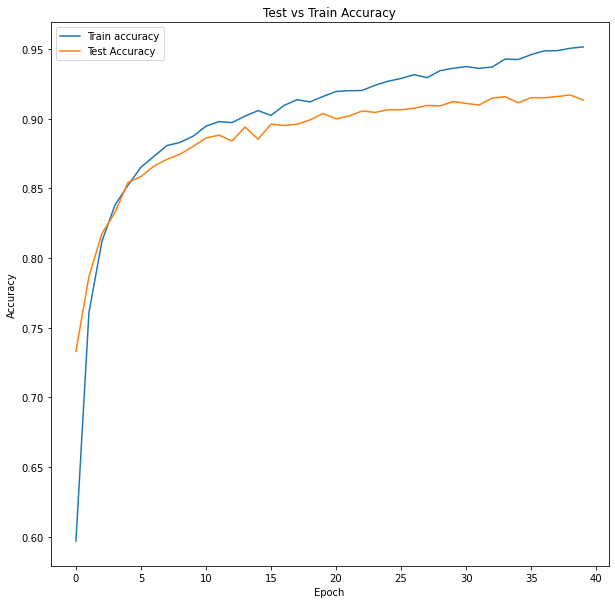

In [109]:
plt.figure(figsize=(10,10))
plt.plot(history_base.history['accuracy'])
plt.plot(history_base.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test vs Train Accuracy')
plt.legend(['Train accuracy', 'Test Accuracy'], loc='upper left')
plt.show()

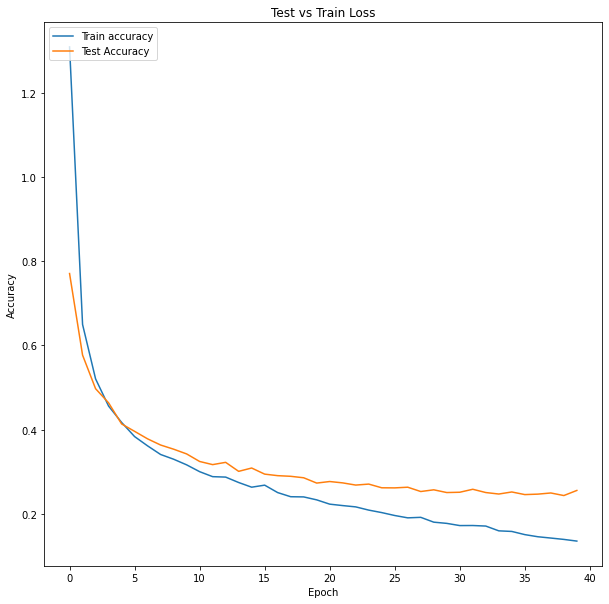

In [111]:
plt.figure(figsize=(10,10))
plt.plot(history_base.history['loss'])
plt.plot(history_base.history['val_loss'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Test vs Train Loss')
plt.legend(['Train accuracy', 'Test Accuracy'], loc='upper left')
plt.show()

## Part- 2

### Dropout

In [95]:
# Setup 1 
con_mod_dropout1 = Sequential([
    Conv2D(filters=20,kernel_size=3,activation='relu',input_shape = (28,28,1)),
    Conv2D(filters=30,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=2) ,
    Flatten(),
    Dense(200,activation ='relu'),
    Dropout(0.5),
    Dense(300,activation='relu'),
    Dropout(0.5),
    Dense(400,activation='relu'),
    Dropout(0.5),
    Dense(10,activation = 'softmax')
    
])

con_mod_dropout1.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])
history = con_mod_dropout1.fit(trainX,trainy,batch_size=4096,epochs=40,verbose=1,validation_data=(testX,testy))



Epoch 1/40


2022-04-20 20:47:44.938469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 1.9862 - accuracy: 0.2586

2022-04-20 20:47:50.319286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 6s 368ms/step - loss: 1.9660 - accuracy: 0.2656 - val_loss: 0.8872 - val_accuracy: 0.6440
Epoch 2/40
15/15 [==============================] - 5s 352ms/step - loss: 0.9442 - accuracy: 0.6372 - val_loss: 0.5937 - val_accuracy: 0.7634
Epoch 3/40
15/15 [==============================] - 5s 350ms/step - loss: 0.6674 - accuracy: 0.7479 - val_loss: 0.5155 - val_accuracy: 0.7921
Epoch 4/40
15/15 [==============================] - 5s 354ms/step - loss: 0.5646 - accuracy: 0.7844 - val_loss: 0.4617 - val_accuracy: 0.8160
Epoch 5/40
15/15 [==============================] - 5s 352ms/step - loss: 0.5003 - accuracy: 0.8173 - val_loss: 0.4156 - val_accuracy: 0.8474
Epoch 6/40
15/15 [==============================] - 5s 352ms/step - loss: 0.4549 - accuracy: 0.8377 - val_loss: 0.3817 - val_accuracy: 0.8609
Epoch 7/40
15/15 [==============================] - 5s 352ms/step - loss: 0.4189 - accuracy: 0.8529 - val_loss: 0.3576 - val_accuracy: 0.8713
Epoch 8/40
15/15 

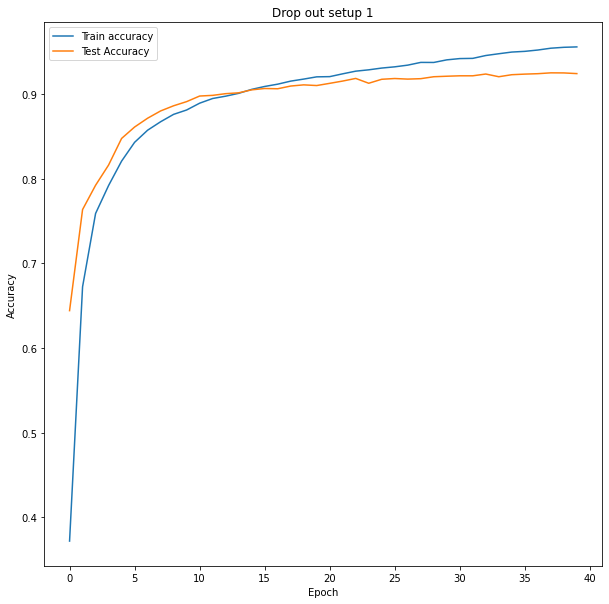

In [97]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Drop out setup 1')
plt.legend(['Train accuracy', 'Test Accuracy'], loc='upper left')
plt.show()



In [98]:
# Setup 2
con_mod_dropout2 = Sequential([
    Conv2D(filters=20,kernel_size=3,activation='relu',input_shape = (28,28,1)),
    Conv2D(filters=30,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=2) ,
    Flatten(),
    Dense(200,activation ='relu'),
    Dropout(0.2),
    Dense(300,activation='relu'),
    Dropout(0.2),
    Dense(400,activation='relu'),
    Dropout(0.2),
    Dense(10,activation = 'softmax')
    
])

con_mod_dropout2.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])
history = con_mod_dropout2.fit(trainX,trainy,batch_size=4096,epochs=40,verbose=1,validation_data=(testX,testy))


Epoch 1/40


2022-04-20 20:54:54.915050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 1.8520 - accuracy: 0.3532

2022-04-20 20:55:00.322597: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 6s 376ms/step - loss: 1.8271 - accuracy: 0.3609 - val_loss: 0.7716 - val_accuracy: 0.7072
Epoch 2/40
15/15 [==============================] - 5s 354ms/step - loss: 0.7614 - accuracy: 0.7138 - val_loss: 0.5647 - val_accuracy: 0.7793
Epoch 3/40
15/15 [==============================] - 5s 353ms/step - loss: 0.5684 - accuracy: 0.7820 - val_loss: 0.4880 - val_accuracy: 0.8169
Epoch 4/40
15/15 [==============================] - 5s 365ms/step - loss: 0.4906 - accuracy: 0.8188 - val_loss: 0.4302 - val_accuracy: 0.8419
Epoch 5/40
15/15 [==============================] - 5s 354ms/step - loss: 0.4231 - accuracy: 0.8488 - val_loss: 0.3809 - val_accuracy: 0.8628
Epoch 6/40
15/15 [==============================] - 5s 362ms/step - loss: 0.3794 - accuracy: 0.8669 - val_loss: 0.3642 - val_accuracy: 0.8653
Epoch 7/40
15/15 [==============================] - 5s 353ms/step - loss: 0.3435 - accuracy: 0.8753 - val_loss: 0.3285 - val_accuracy: 0.8818
Epoch 8/40
15/15 

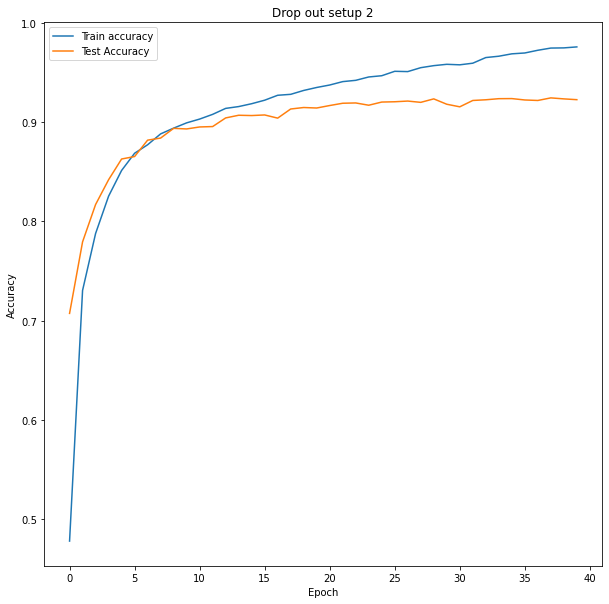

In [99]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Drop out setup 2')
plt.legend(['Train accuracy', 'Test Accuracy'], loc='upper left')
plt.show()

In [101]:
# Setup 3 
con_mod_dropout3 = Sequential([
    Conv2D(filters=20,kernel_size=3,activation='relu',input_shape = (28,28,1)),
    Conv2D(filters=30,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=2) ,
    Flatten(),
    Dense(200,activation ='relu'),
    Dropout(0.8),
    Dense(300,activation='relu'),
    Dropout(0.8),
    Dense(400,activation='relu'),
    Dropout(0.8),
    Dense(10,activation = 'softmax')
    
])

con_mod_dropout3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])
history = con_mod_dropout3.fit(trainX,trainy,batch_size=4096,epochs=40,verbose=1,validation_data=(testX,testy))


Epoch 1/40


2022-04-20 20:59:58.962940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 2.3054 - accuracy: 0.1237

2022-04-20 21:00:04.270986: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 6s 368ms/step - loss: 2.3017 - accuracy: 0.1252 - val_loss: 2.0694 - val_accuracy: 0.3846
Epoch 2/40
15/15 [==============================] - 5s 346ms/step - loss: 2.0352 - accuracy: 0.2439 - val_loss: 1.8006 - val_accuracy: 0.3956
Epoch 3/40
15/15 [==============================] - 5s 350ms/step - loss: 1.8301 - accuracy: 0.3093 - val_loss: 1.5983 - val_accuracy: 0.4582
Epoch 4/40
15/15 [==============================] - 6s 373ms/step - loss: 1.6817 - accuracy: 0.3566 - val_loss: 1.4109 - val_accuracy: 0.4729
Epoch 5/40
15/15 [==============================] - 5s 360ms/step - loss: 1.5579 - accuracy: 0.3853 - val_loss: 1.2812 - val_accuracy: 0.4734
Epoch 6/40
15/15 [==============================] - 6s 372ms/step - loss: 1.4573 - accuracy: 0.3950 - val_loss: 1.1758 - val_accuracy: 0.4836
Epoch 7/40
15/15 [==============================] - 5s 351ms/step - loss: 1.3778 - accuracy: 0.4098 - val_loss: 1.1129 - val_accuracy: 0.4867
Epoch 8/40
15/15 

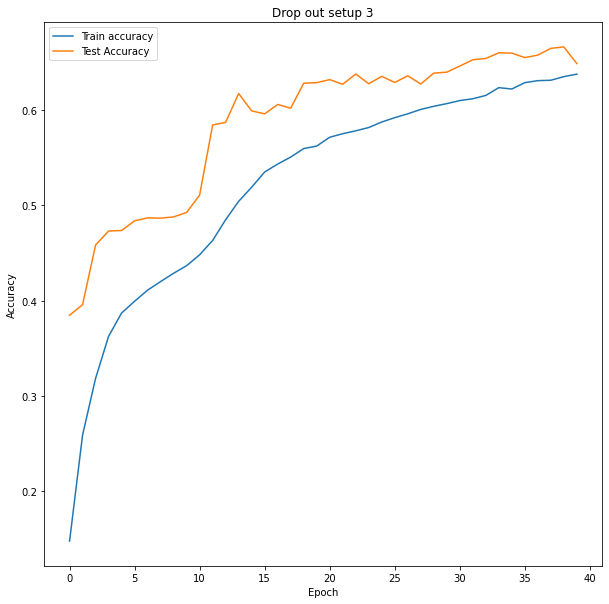

In [102]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Drop out setup 3')
plt.legend(['Train accuracy', 'Test Accuracy'], loc='upper left')
plt.show()

### activation function

In [152]:
# Setup 1 
con_mod_activation1 = Sequential([
    Conv2D(filters=20,kernel_size=3,activation='tanh',input_shape = (28,28,1)),
    Conv2D(filters=30,kernel_size=3,activation='tanh'),
    MaxPooling2D(pool_size=2) ,
    Flatten(),
    Dense(200,activation ='tanh'),
    Dropout(0.5),
    Dense(300,activation='tanh'),
    Dropout(0.5),
    Dense(400,activation='tanh'),
    Dropout(0.5),
    Dense(10,activation = 'softmax')
    
])

con_mod_activation1.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])
history = con_mod_activation1.fit(trainX,trainy,batch_size=4096,epochs=40,verbose=1,validation_data=(testX,testy))


Epoch 1/40


2022-04-20 22:59:57.256010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


59/59 [==============================] - ETA: 0s - loss: 1.2918 - accuracy: 0.5436

2022-04-20 23:00:18.373504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


59/59 [==============================] - 22s 360ms/step - loss: 1.2852 - accuracy: 0.5459 - val_loss: 0.4717 - val_accuracy: 0.8375
Epoch 2/40
59/59 [==============================] - 21s 357ms/step - loss: 0.5274 - accuracy: 0.8193 - val_loss: 0.3873 - val_accuracy: 0.8674
Epoch 3/40
59/59 [==============================] - 21s 354ms/step - loss: 0.4309 - accuracy: 0.8514 - val_loss: 0.3528 - val_accuracy: 0.8784
Epoch 4/40
59/59 [==============================] - 21s 354ms/step - loss: 0.3847 - accuracy: 0.8669 - val_loss: 0.3433 - val_accuracy: 0.8804
Epoch 5/40
59/59 [==============================] - 21s 350ms/step - loss: 0.3625 - accuracy: 0.8750 - val_loss: 0.3272 - val_accuracy: 0.8889
Epoch 6/40
59/59 [==============================] - 21s 351ms/step - loss: 0.3404 - accuracy: 0.8823 - val_loss: 0.3200 - val_accuracy: 0.8906
Epoch 7/40
59/59 [==============================] - 21s 352ms/step - loss: 0.3298 - accuracy: 0.8862 - val_loss: 0.3269 - val_accuracy: 0.8886
Epoch 8/40

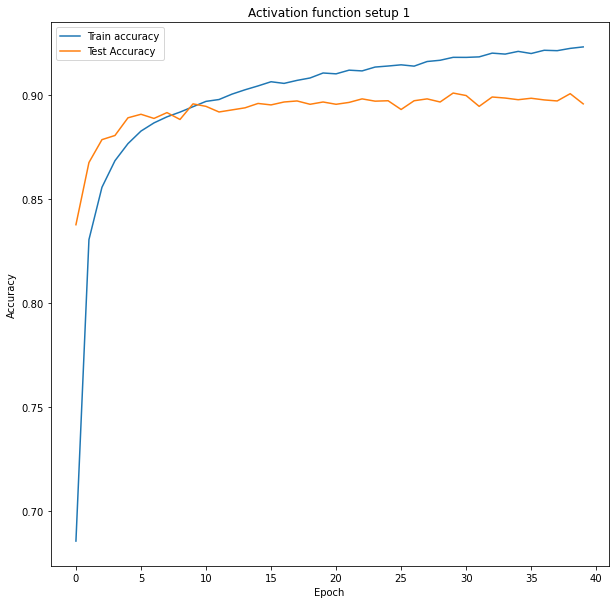

In [153]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Activation function setup 1')
plt.legend(['Train accuracy', 'Test Accuracy'], loc='upper left')
plt.show()

In [129]:
# Setup 2 
con_mod_activation2 = Sequential([
    Conv2D(filters=20,kernel_size=3,activation='ELU',input_shape = (28,28,1)),
    Conv2D(filters=30,kernel_size=3,activation='ELU'),
    MaxPooling2D(pool_size=2) ,
    Flatten(),
    Dense(200,activation ='ELU'),
    Dropout(0.5),
    Dense(300,activation='ELU'),
    Dropout(0.5),
    Dense(400,activation='ELU'),
    Dropout(0.5),
    Dense(10,activation = 'softmax')
    
])

con_mod_activation2.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])
history = con_mod_activation2.fit(trainX,trainy,batch_size=4096,epochs=40,verbose=1,validation_data=(testX,testy))


Epoch 1/40


2022-04-20 22:06:13.977514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 1.5637 - accuracy: 0.4322

2022-04-20 22:06:24.456182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 12s 696ms/step - loss: 1.5374 - accuracy: 0.4417 - val_loss: 0.5975 - val_accuracy: 0.7706
Epoch 2/40
15/15 [==============================] - 11s 691ms/step - loss: 0.6410 - accuracy: 0.7688 - val_loss: 0.4779 - val_accuracy: 0.8234
Epoch 3/40
15/15 [==============================] - 10s 681ms/step - loss: 0.5127 - accuracy: 0.8186 - val_loss: 0.4274 - val_accuracy: 0.8457
Epoch 4/40
15/15 [==============================] - 10s 683ms/step - loss: 0.4446 - accuracy: 0.8433 - val_loss: 0.3881 - val_accuracy: 0.8640
Epoch 5/40
15/15 [==============================] - 11s 703ms/step - loss: 0.4055 - accuracy: 0.8599 - val_loss: 0.3643 - val_accuracy: 0.8722
Epoch 6/40
15/15 [==============================] - 10s 689ms/step - loss: 0.3816 - accuracy: 0.8680 - val_loss: 0.3527 - val_accuracy: 0.8755
Epoch 7/40
15/15 [==============================] - 10s 678ms/step - loss: 0.3584 - accuracy: 0.8755 - val_loss: 0.3322 - val_accuracy: 0.8842
Epoch 8/40

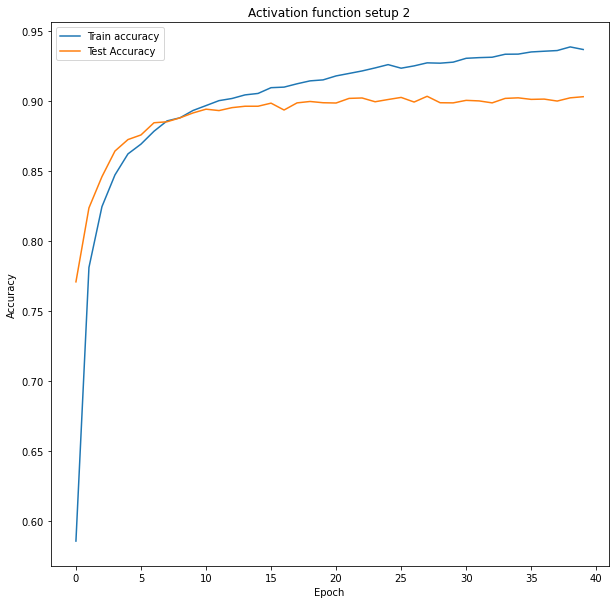

In [130]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Activation function setup 2')
plt.legend(['Train accuracy', 'Test Accuracy'], loc='upper left')
plt.show()

In [131]:
# Setup 3 
con_mod_activation3 = Sequential([
    Conv2D(filters=20,kernel_size=3,activation='relu',input_shape = (28,28,1)),
    Conv2D(filters=30,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=2) ,
    Flatten(),
    Dense(200,activation ='relu'),
    Dropout(0.5),
    Dense(300,activation='relu'),
    Dropout(0.5),
    Dense(400,activation='relu'),
    Dropout(0.5),
    Dense(10,activation = 'softmax')
    
])

con_mod_activation3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])
history = con_mod_activation3.fit(trainX,trainy,batch_size=4096,epochs=40,verbose=1,validation_data=(testX,testy))


Epoch 1/40


2022-04-20 22:14:00.518707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 1.9953 - accuracy: 0.2525

2022-04-20 22:14:05.963221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 6s 377ms/step - loss: 1.9753 - accuracy: 0.2596 - val_loss: 0.8890 - val_accuracy: 0.6589
Epoch 2/40
15/15 [==============================] - 5s 353ms/step - loss: 0.9508 - accuracy: 0.6334 - val_loss: 0.5957 - val_accuracy: 0.7606
Epoch 3/40
15/15 [==============================] - 5s 349ms/step - loss: 0.6647 - accuracy: 0.7456 - val_loss: 0.5111 - val_accuracy: 0.7925
Epoch 4/40
15/15 [==============================] - 5s 344ms/step - loss: 0.5547 - accuracy: 0.7897 - val_loss: 0.4636 - val_accuracy: 0.8267
Epoch 5/40
15/15 [==============================] - 5s 341ms/step - loss: 0.5025 - accuracy: 0.8131 - val_loss: 0.4186 - val_accuracy: 0.8481
Epoch 6/40
15/15 [==============================] - 5s 339ms/step - loss: 0.4457 - accuracy: 0.8405 - val_loss: 0.3783 - val_accuracy: 0.8644
Epoch 7/40
15/15 [==============================] - 5s 340ms/step - loss: 0.4069 - accuracy: 0.8563 - val_loss: 0.3539 - val_accuracy: 0.8761
Epoch 8/40
15/15 

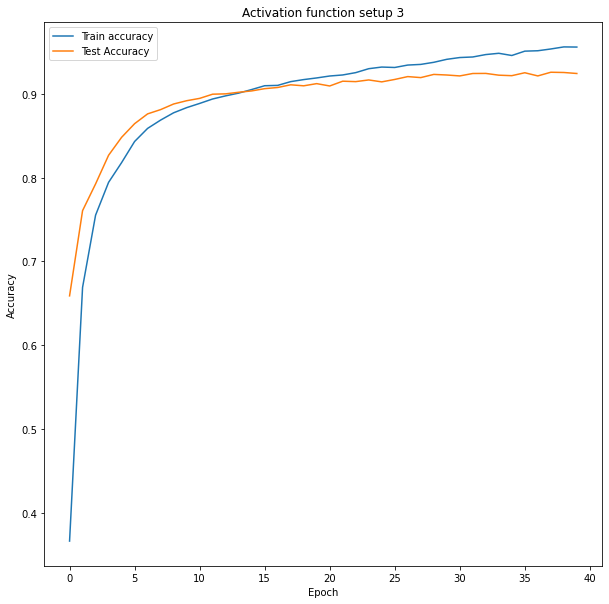

In [132]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Activation function setup 3')
plt.legend(['Train accuracy', 'Test Accuracy'], loc='upper left')
plt.show()

### Optimizer

In [133]:
# Setup 1 
con_mod_optimizer1 = Sequential([
    Conv2D(filters=20,kernel_size=3,activation='relu',input_shape = (28,28,1)),
    Conv2D(filters=30,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=2) ,
    Flatten(),
    Dense(200,activation ='relu'),
    Dropout(0.5),
    Dense(300,activation='relu'),
    Dropout(0.5),
    Dense(400,activation='relu'),
    Dropout(0.5),
    Dense(10,activation = 'softmax')
    
])

con_mod_optimizer1.compile(loss ='categorical_crossentropy', optimizer='rmsprop',metrics =['accuracy'])
history = con_mod_optimizer1.fit(trainX,trainy,batch_size=4096,epochs=40,verbose=1,validation_data=(testX,testy))


Epoch 1/40


2022-04-20 22:24:17.148579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 1.9199 - accuracy: 0.2697

2022-04-20 22:24:23.500278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 7s 390ms/step - loss: 1.9005 - accuracy: 0.2766 - val_loss: 0.8242 - val_accuracy: 0.6783
Epoch 2/40
15/15 [==============================] - 5s 360ms/step - loss: 0.9542 - accuracy: 0.6358 - val_loss: 0.6625 - val_accuracy: 0.7481
Epoch 3/40
15/15 [==============================] - 5s 355ms/step - loss: 0.7420 - accuracy: 0.7212 - val_loss: 0.5691 - val_accuracy: 0.7670
Epoch 4/40
15/15 [==============================] - 5s 351ms/step - loss: 0.6279 - accuracy: 0.7636 - val_loss: 0.5186 - val_accuracy: 0.7961
Epoch 5/40
15/15 [==============================] - 5s 356ms/step - loss: 0.5731 - accuracy: 0.7866 - val_loss: 0.4671 - val_accuracy: 0.8278
Epoch 6/40
15/15 [==============================] - 5s 350ms/step - loss: 0.5324 - accuracy: 0.8039 - val_loss: 0.4389 - val_accuracy: 0.8355
Epoch 7/40
15/15 [==============================] - 5s 360ms/step - loss: 0.4856 - accuracy: 0.8248 - val_loss: 0.4301 - val_accuracy: 0.8428
Epoch 8/40
15/15 

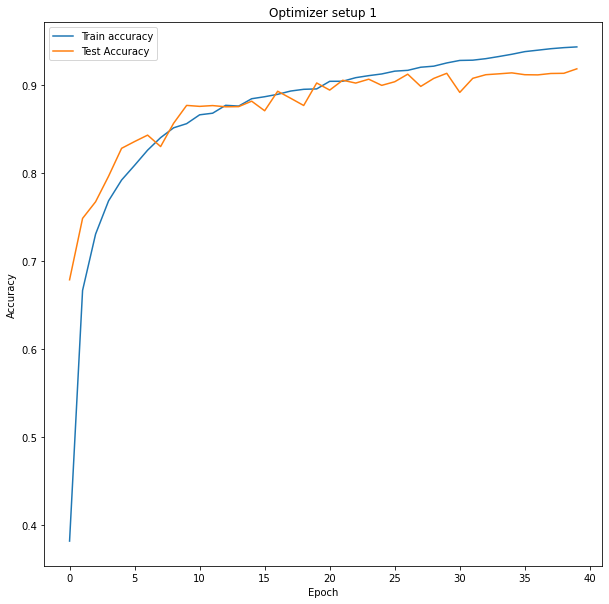

In [135]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Optimizer setup 1')
plt.legend(['Train accuracy', 'Test Accuracy'], loc='upper left')
plt.show()

In [136]:
# Setup 2 
con_mod_optimizer2 = Sequential([
    Conv2D(filters=20,kernel_size=3,activation='relu',input_shape = (28,28,1)),
    Conv2D(filters=30,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=2) ,
    Flatten(),
    Dense(200,activation ='relu'),
    Dropout(0.5),
    Dense(300,activation='relu'),
    Dropout(0.5),
    Dense(400,activation='relu'),
    Dropout(0.5),
    Dense(10,activation = 'softmax')
    
])

con_mod_optimizer2.compile(loss ='categorical_crossentropy', optimizer='sgd',metrics =['accuracy'])
history = con_mod_optimizer2.fit(trainX,trainy,batch_size=4096,epochs=40,verbose=1,validation_data=(testX,testy))


Epoch 1/40


2022-04-20 22:29:25.475173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 2.3087 - accuracy: 0.1049

2022-04-20 22:29:31.044962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 6s 373ms/step - loss: 2.3086 - accuracy: 0.1050 - val_loss: 2.2967 - val_accuracy: 0.1675
Epoch 2/40
15/15 [==============================] - 5s 346ms/step - loss: 2.3018 - accuracy: 0.1146 - val_loss: 2.2890 - val_accuracy: 0.2475
Epoch 3/40
15/15 [==============================] - 5s 355ms/step - loss: 2.2943 - accuracy: 0.1277 - val_loss: 2.2816 - val_accuracy: 0.3098
Epoch 4/40
15/15 [==============================] - 5s 348ms/step - loss: 2.2892 - accuracy: 0.1366 - val_loss: 2.2740 - val_accuracy: 0.3491
Epoch 5/40
15/15 [==============================] - 5s 348ms/step - loss: 2.2834 - accuracy: 0.1461 - val_loss: 2.2657 - val_accuracy: 0.3753
Epoch 6/40
15/15 [==============================] - 5s 347ms/step - loss: 2.2763 - accuracy: 0.1592 - val_loss: 2.2558 - val_accuracy: 0.3973
Epoch 7/40
15/15 [==============================] - 5s 346ms/step - loss: 2.2702 - accuracy: 0.1652 - val_loss: 2.2439 - val_accuracy: 0.4065
Epoch 8/40
15/15 

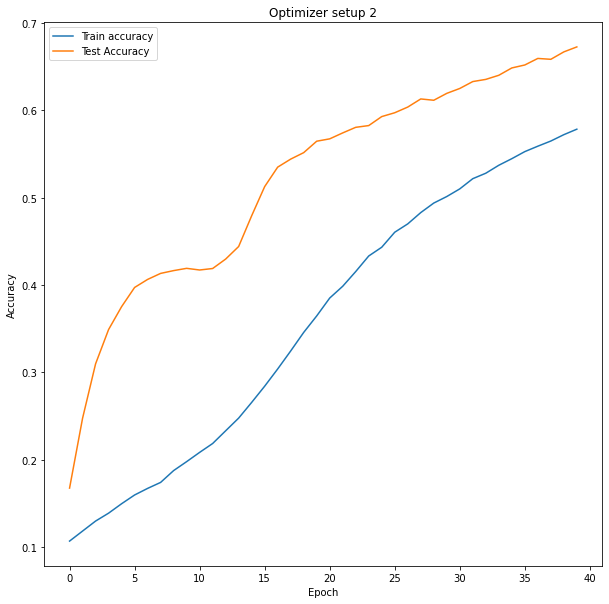

In [137]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Optimizer setup 2')
plt.legend(['Train accuracy', 'Test Accuracy'], loc='upper left')
plt.show()

In [138]:
# Setup 3 
con_mod_optimizer3 = Sequential([
    Conv2D(filters=20,kernel_size=3,activation='relu',input_shape = (28,28,1)),
    Conv2D(filters=30,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=2) ,
    Flatten(),
    Dense(200,activation ='relu'),
    Dropout(0.5),
    Dense(300,activation='relu'),
    Dropout(0.5),
    Dense(400,activation='relu'),
    Dropout(0.5),
    Dense(10,activation = 'softmax')
    
])

con_mod_optimizer3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])
history = con_mod_optimizer3.fit(trainX,trainy,batch_size=4096,epochs=40,verbose=1,validation_data=(testX,testy))



Epoch 1/40


2022-04-20 22:34:15.459979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - ETA: 0s - loss: 1.9883 - accuracy: 0.2618

2022-04-20 22:34:21.386618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


15/15 [==============================] - 7s 390ms/step - loss: 1.9681 - accuracy: 0.2688 - val_loss: 0.8715 - val_accuracy: 0.6562
Epoch 2/40
15/15 [==============================] - 5s 351ms/step - loss: 0.9406 - accuracy: 0.6346 - val_loss: 0.5968 - val_accuracy: 0.7634
Epoch 3/40
15/15 [==============================] - 5s 353ms/step - loss: 0.6730 - accuracy: 0.7421 - val_loss: 0.5163 - val_accuracy: 0.7954
Epoch 4/40
15/15 [==============================] - 5s 354ms/step - loss: 0.5628 - accuracy: 0.7900 - val_loss: 0.4639 - val_accuracy: 0.8141
Epoch 5/40
15/15 [==============================] - 5s 352ms/step - loss: 0.5122 - accuracy: 0.8075 - val_loss: 0.4278 - val_accuracy: 0.8391
Epoch 6/40
15/15 [==============================] - 5s 353ms/step - loss: 0.4601 - accuracy: 0.8330 - val_loss: 0.3879 - val_accuracy: 0.8587
Epoch 7/40
15/15 [==============================] - 5s 353ms/step - loss: 0.4123 - accuracy: 0.8547 - val_loss: 0.3571 - val_accuracy: 0.8707
Epoch 8/40
15/15 

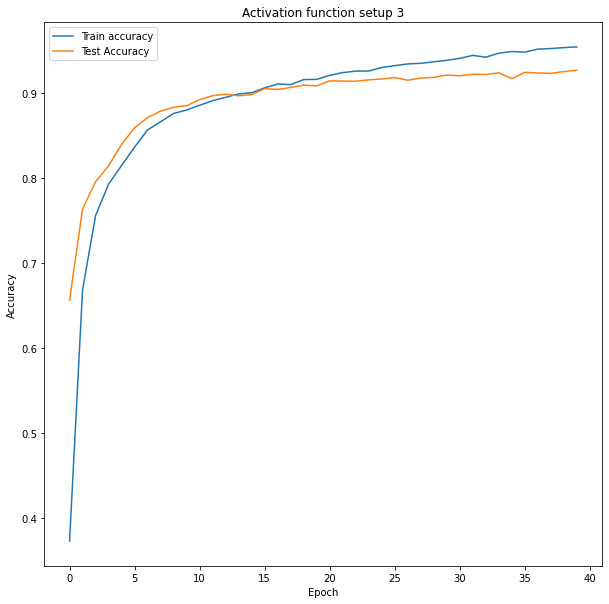

In [139]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title('Activation function setup 3')
plt.legend(['Train accuracy', 'Test Accuracy'], loc='upper left')
plt.show()

### data aug

In [145]:
dp = tf.image.flip_left_right(trainX)

In [146]:
dp1 = tf.image.adjust_brightness(trainX, 0.4)

In [147]:
dp2 = tf.image.rot90(trainX)

In [148]:
trainX = tf.concat((trainX,dp,dp1,dp2),axis=0)

In [149]:
trainX.shape

TensorShape([240000, 28, 28, 1])

In [150]:
trainy = tf.concat((trainy,trainy,trainy,trainy),axis=0)

In [151]:
con_mod_aug = Sequential([
    Conv2D(filters=20,kernel_size=3,activation='relu',input_shape = (28,28,1)),
    Conv2D(filters=30,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=2) ,
    Flatten(),
    Dense(200,activation ='relu'),
    Dropout(0.5),
    Dense(300,activation='relu'),
    Dropout(0.5),
    Dense(400,activation='relu'),
    Dropout(0.5),
    Dense(10,activation = 'softmax')
    
])

con_mod_aug.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['accuracy'])
history = con_mod_aug.fit(trainX,trainy,batch_size=4096,epochs=40,verbose=1,validation_data=(testX,testy))



Epoch 1/40


2022-04-20 22:42:11.492738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


59/59 [==============================] - ETA: 0s - loss: 1.6553 - accuracy: 0.3770

2022-04-20 22:42:33.122604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


59/59 [==============================] - 23s 370ms/step - loss: 1.6475 - accuracy: 0.3800 - val_loss: 0.5320 - val_accuracy: 0.8006
Epoch 2/40
59/59 [==============================] - 21s 360ms/step - loss: 0.6072 - accuracy: 0.7811 - val_loss: 0.4040 - val_accuracy: 0.8529
Epoch 3/40
59/59 [==============================] - 21s 354ms/step - loss: 0.4661 - accuracy: 0.8359 - val_loss: 0.3403 - val_accuracy: 0.8788
Epoch 4/40
59/59 [==============================] - 21s 362ms/step - loss: 0.3984 - accuracy: 0.8602 - val_loss: 0.3029 - val_accuracy: 0.8941
Epoch 5/40
59/59 [==============================] - 21s 360ms/step - loss: 0.3560 - accuracy: 0.8743 - val_loss: 0.2819 - val_accuracy: 0.8983
Epoch 6/40
59/59 [==============================] - 21s 360ms/step - loss: 0.3234 - accuracy: 0.8855 - val_loss: 0.2765 - val_accuracy: 0.8988
Epoch 7/40
59/59 [==============================] - 21s 354ms/step - loss: 0.2965 - accuracy: 0.8942 - val_loss: 0.2587 - val_accuracy: 0.9079
Epoch 8/40